In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
train_dir = r'C:\Users\HP-GK\Bangkit 2023\person\train'
val_dir = r'C:\Users\HP-GK\Bangkit 2023\person\val'
test_dir = r'C:\Users\HP-GK\Bangkit 2023\person\test'

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical')

Found 440 images belonging to 4 classes.
Found 60 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              metrics=['accuracy'])

In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=50,
    validation_data=val_generator)

Epoch 1/50
25/25 [==============================] - 17s 603ms/step - loss: 1.3771 - accuracy: 0.3520 - val_loss: 1.3344 - val_accuracy: 0.3667
Epoch 2/50
25/25 [==============================] - 10s 393ms/step - loss: 1.3466 - accuracy: 0.2883 - val_loss: 1.2933 - val_accuracy: 0.4333
Epoch 3/50
25/25 [==============================] - 10s 384ms/step - loss: 1.3286 - accuracy: 0.3495 - val_loss: 1.2901 - val_accuracy: 0.4000
Epoch 4/50
25/25 [==============================] - 10s 395ms/step - loss: 1.3177 - accuracy: 0.4225 - val_loss: 1.2715 - val_accuracy: 0.5667
Epoch 5/50
25/25 [==============================] - 10s 398ms/step - loss: 1.2917 - accuracy: 0.4125 - val_loss: 1.2418 - val_accuracy: 0.5000
Epoch 6/50
25/25 [==============================] - 10s 405ms/step - loss: 1.2742 - accuracy: 0.4490 - val_loss: 1.2278 - val_accuracy: 0.5333
Epoch 7/50
25/25 [==============================] - 10s 394ms/step - loss: 1.2356 - accuracy: 0.4439 - val_loss: 1.1964 - val_accuracy: 0.5833

In [36]:
epoch_avg_acc = sum(history.history['accuracy']) / len(history.history['accuracy'])
print("Epoch average accuracy: {:.2f}%".format(epoch_avg_acc * 100))

Epoch average accuracy: 84.52%


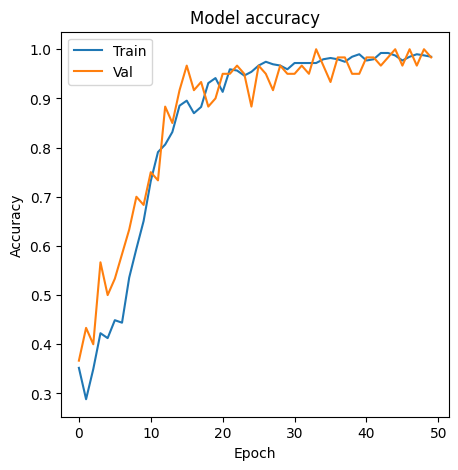

In [28]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

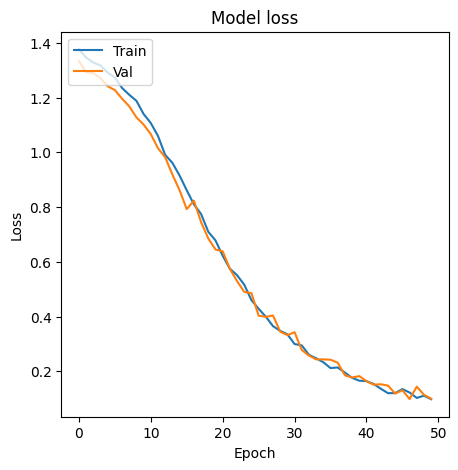

In [29]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [12]:
y_pred = model.predict(test_generator)

5/5 [==============================] - 1s 229ms/step


In [15]:
y_pred = np.argmax(y_pred, axis=1)

In [16]:
target_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 1       0.13      0.13      0.13        15
     Class 2       0.20      0.20      0.20        15
     Class 3       0.40      0.40      0.40        25
     Class 4       0.28      0.28      0.28        25

    accuracy                           0.28        80
   macro avg       0.25      0.25      0.25        80
weighted avg       0.28      0.28      0.28        80



In [23]:
cm = confusion_matrix(test_generator.classes, y_pred)

In [25]:
cm

array([[ 2,  2,  6,  5],
       [ 3,  3,  2,  7],
       [ 5,  4, 10,  6],
       [ 5,  6,  7,  7]], dtype=int64)

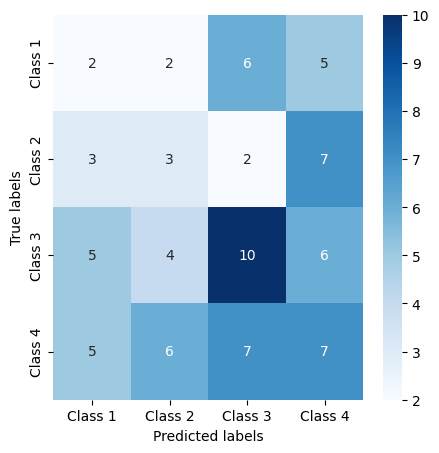

In [27]:
# Create heatmap of confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticklabels(target_names)
ax.set_yticklabels(target_names)
plt.show()